In [1]:
# импортируем модули с sklearn датасет с ирисами
from sklearn.datasets import load_iris
# Импортируем классификатор для метода к-соседей
from sklearn.neighbors import KNeighborsClassifier
# Импортируем метрики для отображения точности
from sklearn import  metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Определяем объект iris который хранит в себе датасет с ирисами
iris = load_iris()

In [4]:

# смотрим тип данных (лбъект контейнера позволяющий обращаться к данным по ключам и атрибутам)
type(iris)

sklearn.utils._bunch.Bunch

In [6]:

# Смотрим сами данные
iris.data
     

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# Смотрим какие вообще есть признаки в данном датасете
iris.feature_names
     

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# смотрим целевые признаки
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:

# Просматриваем то, что в нашем даатсете 150 записей и 4 столбца
iris.data.shape

(150, 4)

In [10]:
# определяем наши x и y (наши данные и метки, которые мы пытаемся предсказать)
X = iris.data
y = iris.target

In [11]:

# Разделяем наши данные (храним в 4 переменных для тестовых и тренировочных данных). Помещаем в него наши данные и метки и определяем сколько будет занимать тестовая выборка и чтобы сплит всегда был воспроизводимым
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Выводим данные
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [12]:
# Определяем диапазон значений k
k_range = range(1, 26)
# Словарь для хранения оценок точности модели
scores = {}
# Список для хранения оценок точности без использования словаря
scores_list = []
# Перебираем значения k
for k in k_range:
  # Создаем классификатор с k соседями
  knn = KNeighborsClassifier(n_neighbors=k)
  # Обучаем классификатор на тренировочных данных
  knn.fit(X_train,y_train)
  # Предсказываем метки классов для тестовых данных
  y_pred=knn.predict(X_test)
  # Оцениваем точность классификации и сохраняем в словарь
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  # Добавляем оценку точности в список
  scores_list.append(metrics.accuracy_score(y_test, y_pred))
     

In [13]:

# Выводим словарь с оценками точности для каждого k
scores

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 0.9666666666666667,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 1.0,
 25: 1.0}

Text(0, 0.5, 'Accuracy')

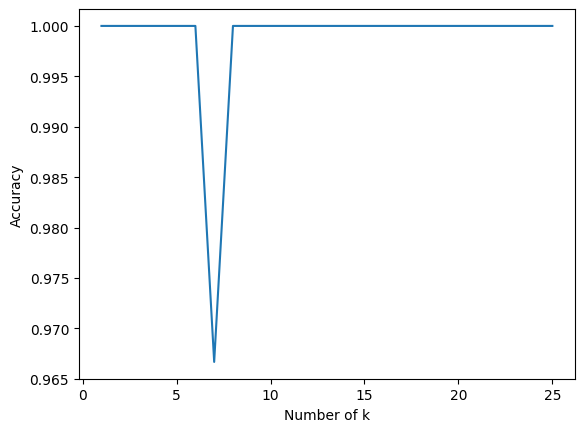

In [14]:
# Визуализируем зависимость точности от числа соседей k
plt.plot(k_range, scores_list)
# Название оси X
plt.xlabel('Number of k')
# Название оси Y
plt.ylabel('Accuracy')

In [15]:

# Создаем классификатор с k=3 и обучаем на всех данных
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [16]:

# Определяем словарь, сопоставляющий числовые метки классов их названиям
classes = {0:'setosa',1:'versicolor',2:'virginica'}

In [17]:
# Определяем новые наблюдения
x_new = [[3,4,5,2],
         [5,4,2,2]]

In [18]:

# Предсказываем классы для новых наблюдений
y_predict = knn.predict(x_new)


In [19]:
# Выводим предсказанные классы
print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
